In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv")

To answer some questions, you will need to normalize the dataset using the MinMaxScaler after removing the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a random state of 42 (for reproducibility). Run a multiple linear regression using the training set and evaluate your model on the test set.

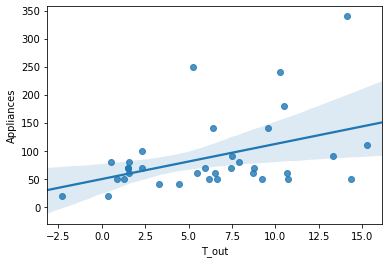

In [50]:
#Simple Linear Regression

#df=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')
#rename columns
column_names = {'date': "date", 'Appliances': 'Appliances', 'lights': 'lights', 'T1': 'Temp_kitchen', 'RH_1': 'Hum_kitchen', 'T2':'Temp_living', 'RH_2': 'Hum_living', 'T3':
                'Temp_laundry',
       'RH_3': 'Hum_laundry', 'T4' : 'Temp_office', 'RH_4': 'Hum_office', 'T5': 'Temp_bathroom', 'RH_5': 'Hum_bathroom', 'T6' :'Temp_outsideB', 'RH_6' : 
                'Hum_outsideB', 'T7': 'Temp_ironing', 'RH_7': 'Hum_ironing', 'T8': 'Temp_teenager',
       'RH_8': 'Hum_teenager', 'T9': 'Temp_parent', 'RH_9':'Hum_parent', 'T_out' : 'T_out', 'Press_mm_hg': 'Press_mm_hg', 'RH_out': 'RH_out', 'Windspeed': 'Windspeed',
       'Visibility':'Visibility', 'Tdewpoint':'Tdewpoint', 'rv1':'Rand_var1', 'rv2': 'Rand_var2'}
df = df.rename(columns=column_names)
#select a sample of the dataset
simple_linear_reg_df = df[['T_out', 'Appliances']].sample(35, random_state=2)
#regression plot
sns.regplot(x="T_out", y="Appliances", data=simple_linear_reg_df)

In [51]:
#pd.set_option("display.max_columns", None)
df.head()
#df.columns

,date,Appliances,lights,Temp_kitchen,Hum_kitchen,Temp_living,Hum_living,Temp_laundry,Hum_laundry,Temp_office,Hum_office,Temp_bathroom,Hum_bathroom,Temp_outsideB,Hum_outsideB,Temp_ironing,Hum_ironing,Temp_teenager,Hum_teenager,Temp_parent,Hum_parent,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Rand_var1,Rand_var2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [52]:
#Measuring Regression Performance
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = df.copy()
df = df.drop(columns=['date', 'lights'])
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df
target = normalised_df['Appliances']

In [103]:
#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, target, test_size=0.3, random_state=42)
linear_model = LinearRegression()

In [104]:
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)

In [105]:
#● Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae,2) #prints 0.063
#print(mae)0.05565321058223605

0.0

In [87]:
#● Residual Sum of Squares (RSS)
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
#print(rss)52.36003038390005
round(rss, 2) #prints 1.823

52.36

In [99]:
#● Root Mean Square Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
#print(rmse)0.09403779005863358
round(rmse, 2) #prints 0.089

0.09

In [85]:
#● R-Squared
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
#print(r2_score)0.01729168186846375
round(r2_score, 2) #prints 0.893

0.02

In [106]:
#Lesson 4: Penalization Methods
#● Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)
predicted_values = ridge_reg.predict(x_test)
#from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
#print(rmse)0.09403779005863358
round(rmse, 2)

0.0

In [107]:
#● Feature Selection and Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

predicted_values = lasso_reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse)

0.0

In [108]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
    #this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

In [109]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [110]:
print(final_weights)

         Features  Linear_Model_Weight  Ridge_Weight  Lasso_weight
0           T_out        -3.434246e-16     -0.000952      0.000000
1     Hum_ironing        -2.503400e-16     -0.000167     -0.000000
2    Temp_laundry        -1.921194e-16      0.001046      0.000000
3       Windspeed        -1.641454e-16      0.000110      0.000000
4     Hum_laundry        -1.507025e-16      0.000346      0.000000
5   Temp_teenager        -1.495324e-16      0.000367      0.000000
6     Temp_living        -1.450848e-16     -0.000732      0.000000
7    Hum_outsideB        -1.254853e-16      0.000129     -0.000000
8      Hum_living        -3.779107e-17     -0.001493     -0.000000
9   Temp_outsideB        -3.426886e-17      0.000789      0.000000
10    Temp_parent        -3.137100e-17     -0.000686      0.000000
11      Rand_var1        -3.063599e-17      0.000003     -0.000000
12      Rand_var2        -3.063599e-17      0.000003     -0.000000
13    Hum_kitchen        -2.747249e-17      0.001887      0.00